In [1]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carga dos Dados 

In [2]:
# Abrir o dataset e checar a estrutura do mesmo
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


### EDA

In [3]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


In [ ]:
# Plot de Dispersão
# X = horas_estudos (var independente)
# y = pontuacao_teste (var dependente)
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

In [ ]:
# Verificar se há outliers para X
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='horas_estudo')

In [ ]:
# Verificar se há outliers para Y
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

In [ ]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

In [ ]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

In [ ]:
# Histograma das variáveis - X
sns.displot(df_pontuacao, x='horas_estudo')

In [ ]:
# Histograma das variáveis - y
sns.displot(df_pontuacao, x='pontuacao_teste')

## Treinameto do modelo

In [11]:
# Dividir os dados de treino e teste
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size=0.3, random_state=50)

In [12]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [ ]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

In [14]:
# Imprimir a equação da reta
# y = aX + b
print("y = {:4f}X + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

y = 15.642619X + 8.476601


### Validar Modelo - Métricas

In [15]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_teste)

In [24]:
# Calcular métrica R-squared
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_teste, y_pred)

0.9828400452912442

In [17]:
# Calcular métrica MAE (Mean Absolute Error)
mean_absolute_error(y_teste, y_pred)

np.float64(22.957470277134615)

In [18]:
# Calcular métrica MSE (Mean Squared Error)
mean_squared_error(y_teste, y_pred)

np.float64(766.9972992416427)

In [25]:
# Calcular métrica RMSE (Square Root Mean Squared Error)
root_mean_squared_error(y_teste, y_pred)

np.float64(27.69471608884342)

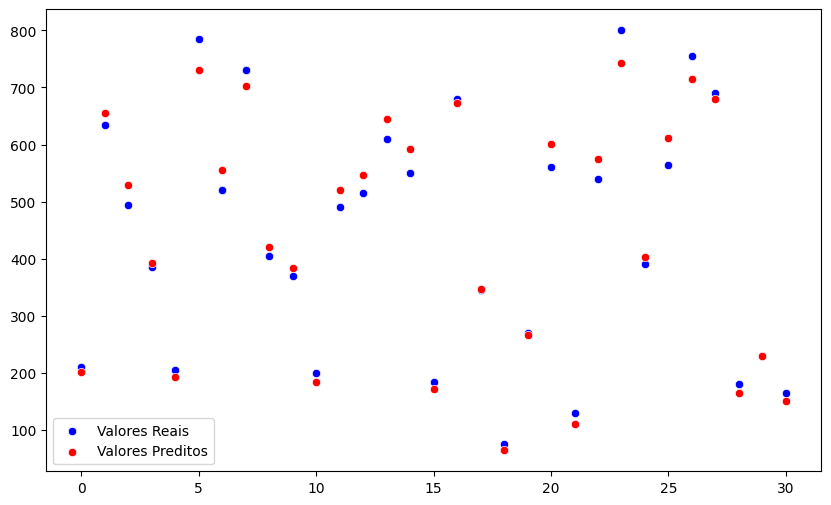

In [27]:
# Análise Gráfica
x_axis = range(len(y_teste))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_teste.reshape(-1), color="blue", label="Valores Reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Valores Preditos")
plt.legend()
plt.show()
